# Wave Analysis using Altimeter data


Here we will illustrate how to extract wave conditions based on altimeter data for a specific geographical region. 

We will be querying data already downloaded from the obtained from Australian Ocean Data Network portal [AODN](https://portal.aodn.org.au/). 

> You should look at **RADWave** [documentation](https://radwave.readthedocs.io/en/latest/usage.html#getting-altimeter-values-from-data-providers) and the embeded video that explain how to select both a spatial bounding box and a temporal extent from the portal and how to export the file containing the `List of URLs`. This `TXT` file contains a list of `NETCDF` files for each available satellites. 

In [1]:
from IPython.display import IFrame
IFrame(src='https://bit.ly/2ROFoLY', width=900, height=600)

## Loading RADWave library and initialisation

We first start by importing **RADwave** library into our working space.

In [2]:
import RADWave as rwave

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

geopy is required and needs to be installed via pip


Once the list of `NETCDF` data file has been saved on disk, you will be able to load it by initialising **RADWave** main Python class called `waveAnalysis`.

For a detail overview of the options available in this class, you can have a look at the [waveAnalysis API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis).

Here, we will use the following parameters:

+ `altimeterURL` (str): list of NetCDF URLs downloaded from the wave data portal containing the radar altimeter data ['../dataset/IMOSURLs.txt']
+ `bbox` (list): bounding box specifying the geographical extent of the uploaded dataset following the convention [lon min,lon max,lat min,lat max]  [here we use a region located offshore sydney]
+ `stime` (list):  starting time of wave climate analysis following the convention [year, month, day] [we chose the 1st of January 1985]
+ `etime` (list): ending time of wave climate analysis following the convention [year, month, day] [we chose the 31st of December 2018]

For this example, we don't specify a list of particular satellites to use (`satNames` keyword) so all of them will be queried. In other words we will look at all the records from the 10 altimeters: 

JASON-2 - JASON-3 - SARAL - SENTINEL-3A - CRYOSAT-2 - ENVISAT - GEOSAT - ERS-2 - GFO - TOPEX.

In [3]:
wa = rwave.waveAnalysis(altimeterURL='../../dataset/IMOSURLs.txt', bbox=[152.0,155.0,-36.0,-34.0], 
                  stime=[1985,1,1], etime=[2022,12,31])

# Processing altimeters data

After class initialisation querying the actual dataset is realised by calling the `processAltimeterData` function. The description of this function is available from the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.processingAltimeterData).

The function can take some times to execute depending on the number of NETCDF files to load and the size of the dataset to query (here it should not take more than **30 s**).

> **RADWave** uses the uploaded file containing the list of URLs to query via `THREDDS` the remote data. This operation can take *several minutes* and when looking at a large region it is recommended to divide the analyse in smaller regions and download a series of URLs text file instead of the entire domain directly.

In [4]:
wa.processAltimeterData(altimeter_pick='all', saveCSV = 'altimeterData.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks                               6   
   +  name JASON-3     / number of tracks                               4   
   +  name SARAL       / number of tracks                               6   
   +  name SENTINEL-3A / number of tracks                               6   
   +  name CRYOSAT-2   / number of tracks                               6   
   +  name ENVISAT     / number of tracks                               6   
   +  name GEOSAT      / number of tracks                               6   
   +  name ERS-2       / number of tracks                               6   
   +  name GFO         / number of tracks                               6   
   +  name TOPEX       / number of tracks                               6   
 
Processing altimeter dataset took:  12 s


In case where the `processAltimeterData` function has already been executed, one can load directly the processed data from the created `CSV` file in a more efficient way by running the `readingAltimeterData` function as follow:

In [3]:
wa.readAltimeterData(saveCSV = 'altimeterData.csv')

Reading Processed Altimeter Dataset 



Once the dataset has been queried, we can plot the altimeter data points on a map using the `visualiseData` function.

This function **plots** and **saves** in a figure the geographical coordinates of processed altimeter data.

In [4]:
wa.visualiseData(title="Altimeter data tracks", extent=[149.,158.,-38.,-32.], 
                 addcity=['Sydney', 151.2093, -33.8688], markersize=40, zoom=8,
                 fsize=(8, 7), fsave='altimeterdata')

Figure saved:  altimeterdata


# Computing wave regime for specified location


To perform wave analysis and compute the wave parameters discussed in the [documentation](https://radwave.readthedocs.io/en/latest/method.html#), we run the `generateTimeSeries` function.

This function computes time series of wave characteristics from available altimeter data namely the significant wave height and the wind speed.

It computes both **instantaneous** and **monthly** wave variables:

+ significant wave height (m) - wh & wh_rolling
+ wave period (s)  - period & period_rolling
+ wave energy flux (kW/m)  - power & power_rolling
+ wave average energy density (J/m2)  - energy & energy_rolling
+ wave group velocity (m/s)  - speed & speed_rolling

In [5]:
wa.generateTimeSeries()

date      wh  wh_rolling    period  \
0     1985-04-13 08:22:39.835939  3.3380    3.338000  6.820216   
1     1985-04-16 08:31:20.722658  3.2370    3.287500  7.593262   
2     1985-04-16 08:31:30.031252  3.2520    3.275667  8.068063   
3     1985-04-16 08:31:38.363283  3.1695    3.249125  8.171445   
4     1985-04-22 08:48:59.253906  2.2560    3.050500  7.566001   
...                          ...     ...         ...       ...   
16542 2021-12-31 20:02:13.773438  1.7725    1.900034  5.175811   
16543 2021-12-31 20:02:24.796875  1.5290    1.895087  4.810540   
16544 2021-12-31 23:29:20.796880  1.4150    1.888770  4.762211   
16545 2022-01-01 07:15:46.355470  1.8870    1.888747  5.251115   
16546 2022-01-01 07:16:03.152346  1.9070    1.888981  5.129678   

       period_rolling       power  power_rolling        energy  \
0            6.820216  149.027408     149.027408  13999.973663   
1            7.206739  156.030380     152.528894  13165.578678   
2            7.493847  167.326889     157.461559  13287.877870   
3            7.663247  160.981444     158.341531  12622.232507   
4            7.643797   75.516168     141.776458   6394.885084   
...               ...         ...            ...           ...   
16542        6.304932   31.889395      61.147344   3947.544566   
16543        6.285007   22.054851      60.626111   2937.443519   
16544        6.264970   18.698936      60.074437   2515.750079   
16545        6.251803   36.668300      59.770462   4474.024936   
16546        6.237417   36.583640      59.473195   4569.366418   

       energy_rolling      speed  speed_rolling        lat        lon  day  \
0        13999.973663  10.644835      10.644835 -34.356148  152.33946   13   
1        13582.776170  11.851388      11.248111 -34.494278  153.30789   16   
2        13484.476737  12.592446      11.696223 -35.012566  153.01370   16   
3        13268.915679  12.753801      11.960618 -35.475792  152.74774   16   
4        11894.109560  11.808839      11.930262 -35.719948  154.70033   22   
...               ...        ...            ...        ...        ...  ...   
16542     5494.936831   8.078286       9.840592 -35.151200  153.96713   31   
16543     5460.836920   7.508179       9.809493 -34.504810  153.77713   31   
16544     5422.085778   7.432748       9.778220 -35.701008  152.03517   31   
16545     5409.773299   8.195819       9.757669 -34.497337  153.64697    1   
16546     5398.998852   8.006283       9.735216 -35.483154  153.35626    1   

       month  year  
0          4  1985  
1          4  1985  
2          4  1985  
3          4  1985  
4          4  1985  
...      ...   ...  
16542     12  2021  
16543     12  2021  
16544     12  2021  
16545      1  2022  
16546      1  2022  

[16547 rows x 16 columns]

The class `waveAnalysis` stores a Pandas dataframe (called `timeseries`) of computed wave parameters that can be subsequently used to perform additional analysis.

To visualise this dataframe, one can do:

In [6]:
display(wa.timeseries)

date      wh  wh_rolling    period  \
0     1985-04-13 08:22:39.835939  3.3380    3.338000  6.820216   
1     1985-04-16 08:31:20.722658  3.2370    3.287500  7.593262   
2     1985-04-16 08:31:30.031252  3.2520    3.275667  8.068063   
3     1985-04-16 08:31:38.363283  3.1695    3.249125  8.171445   
4     1985-04-22 08:48:59.253906  2.2560    3.050500  7.566001   
...                          ...     ...         ...       ...   
16542 2021-12-31 20:02:13.773438  1.7725    1.900034  5.175811   
16543 2021-12-31 20:02:24.796875  1.5290    1.895087  4.810540   
16544 2021-12-31 23:29:20.796880  1.4150    1.888770  4.762211   
16545 2022-01-01 07:15:46.355470  1.8870    1.888747  5.251115   
16546 2022-01-01 07:16:03.152346  1.9070    1.888981  5.129678   

       period_rolling       power  power_rolling        energy  \
0            6.820216  149.027408     149.027408  13999.973663   
1            7.206739  156.030380     152.528894  13165.578678   
2            7.493847  167.326889     157.461559  13287.877870   
3            7.663247  160.981444     158.341531  12622.232507   
4            7.643797   75.516168     141.776458   6394.885084   
...               ...         ...            ...           ...   
16542        6.304932   31.889395      61.147344   3947.544566   
16543        6.285007   22.054851      60.626111   2937.443519   
16544        6.264970   18.698936      60.074437   2515.750079   
16545        6.251803   36.668300      59.770462   4474.024936   
16546        6.237417   36.583640      59.473195   4569.366418   

       energy_rolling      speed  speed_rolling        lat        lon  day  \
0        13999.973663  10.644835      10.644835 -34.356148  152.33946   13   
1        13582.776170  11.851388      11.248111 -34.494278  153.30789   16   
2        13484.476737  12.592446      11.696223 -35.012566  153.01370   16   
3        13268.915679  12.753801      11.960618 -35.475792  152.74774   16   
4        11894.109560  11.808839      11.930262 -35.719948  154.70033   22   
...               ...        ...            ...        ...        ...  ...   
16542     5494.936831   8.078286       9.840592 -35.151200  153.96713   31   
16543     5460.836920   7.508179       9.809493 -34.504810  153.77713   31   
16544     5422.085778   7.432748       9.778220 -35.701008  152.03517   31   
16545     5409.773299   8.195819       9.757669 -34.497337  153.64697    1   
16546     5398.998852   8.006283       9.735216 -35.483154  153.35626    1   

       month  year  
0          4  1985  
1          4  1985  
2          4  1985  
3          4  1985  
4          4  1985  
...      ...   ...  
16542     12  2021  
16543     12  2021  
16544     12  2021  
16545      1  2022  
16546      1  2022  

[16547 rows x 16 columns]

and to list the header names:

In [7]:
list(wa.timeseries)

['date',
 'wh',
 'wh_rolling',
 'period',
 'period_rolling',
 'power',
 'power_rolling',
 'energy',
 'energy_rolling',
 'speed',
 'speed_rolling',
 'lat',
 'lon',
 'day',
 'month',
 'year']

## Plotting time series

We can now plot time series of **RADWave** calculated wave parameters. This is done by calling the `plotTimeSeries` function. 

Amongst the available option one can choose to (complete list of options is available in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.plotTimeSeries) :
+ specify a specific temporal extent with the keyword `time` that provide the extent of years for the time series.
+ define the wave parameter to visualise using the keyword `series` that takes the following choices: 'H', 'T', 'P', 'E' and 'Cg'. 
            
In addition to the time series, the function provides additional information:  
 
+ Maximum parameter value
+ Mean parameter value
+ Median parameter value
+ 95th percentile parameter value

Max wave height: 21.297 m
Mean wave height: 2.425 m
Median wave height: 2.187 m
95th percentile wave height: 4.388 m


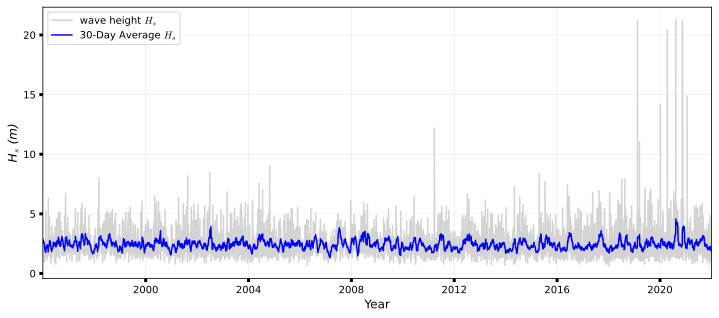

Figure saved:  seriesH
Max wave period: 26.458 s
Mean wave period: 6.339 s
Median wave period: 6.190 s
95th percentile wave period: 8.067 s


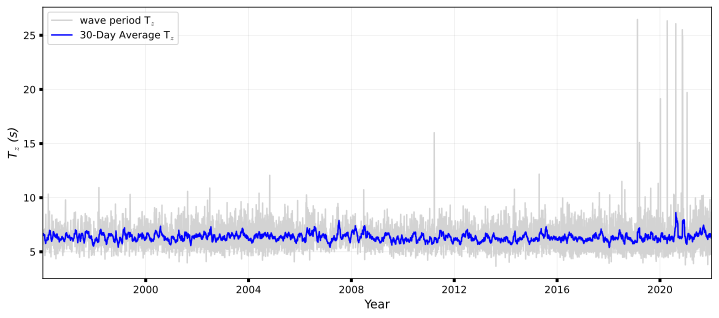

Max wave power: 23262.439 kW/m
Mean wave power: 109.203 kW/m
Median wave power: 57.999 kW/m
95th percentile wave power: 287.640 kW/m


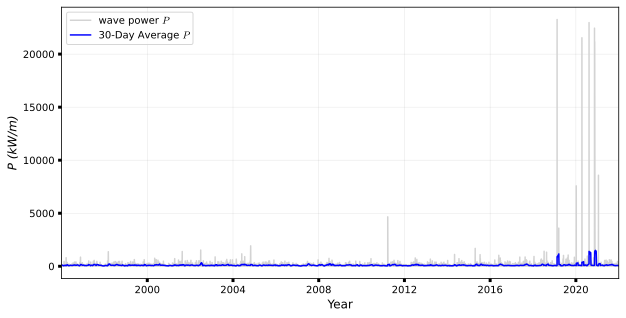

Max wave energy: 569890.498 J/m2
Mean wave energy: 8940.190 J/m2
Median wave energy: 6009.691 J/m2
95th percentile wave energy: 24192.894 J/m2


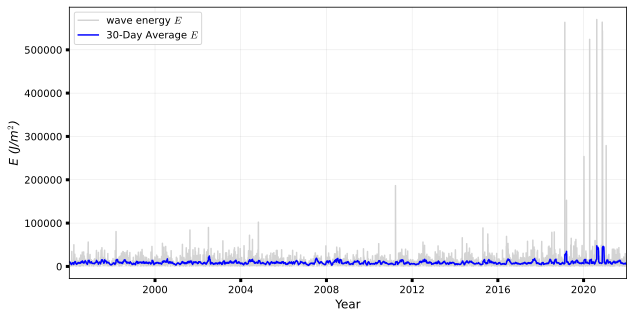

Max wave celerity: 41.295 m/s
Mean wave celerity: 9.894 m/s
Median wave celerity: 9.660 m/s
95th percentile wave celerity: 12.591 m/s


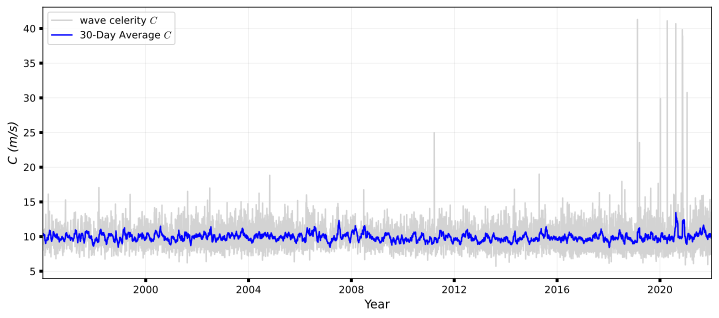

In [8]:
# Significant wave height
wa.plotTimeSeries(time=[1995,2022], series='H', fsize=(12, 5), fsave='seriesH')

# Wave period
wa.plotTimeSeries(time=[1995,2022], series='T', fsize=(12, 5), fsave=None)

# Wave power
wa.plotTimeSeries(time=[1995,2022], series='P', fsize=(10, 5), fsave=None)

# Wave energy
wa.plotTimeSeries(time=[1995,2022], series='E', fsize=(10, 5), fsave=None)

# Wave group velocity
wa.plotTimeSeries(time=[1995,2022], series='Cg', fsize=(12, 5), fsave=None)

# Processing wave seasonability trends 

In addition to time series, one can analyse the seasonal characteristics of each parameter computed from the altimeter dataset. 

For a specified time interval and geographical extent, it computes the monthly seasonality of specific wave variables (the option in the `series` keyword are: wh, period, power, energy and speed). 

Obtained monthly averaged values are stored and returned with a `Pandas` dataframe. 

> User has the option to plot the computed wave paraneter characteristics as a heatmap, a box plot and a standard deviation graph.

For the wave height series, a **Seasonal Mann-Kendall** test is also performed to determine monotonic trends in computed dataset using the package from Hussain & Mahmud (2019).

Hussain & Mahmud, 2019: pyMannKendall: a python package for non parametric Mann Kendall family of trend tests - JOSS, 4(39), 1556.

A full explanation on the available options for the `computeSeasonalCharacteristics` function is provided in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.seriesSeasonMonth).

In [9]:
!pip install pymannkendall

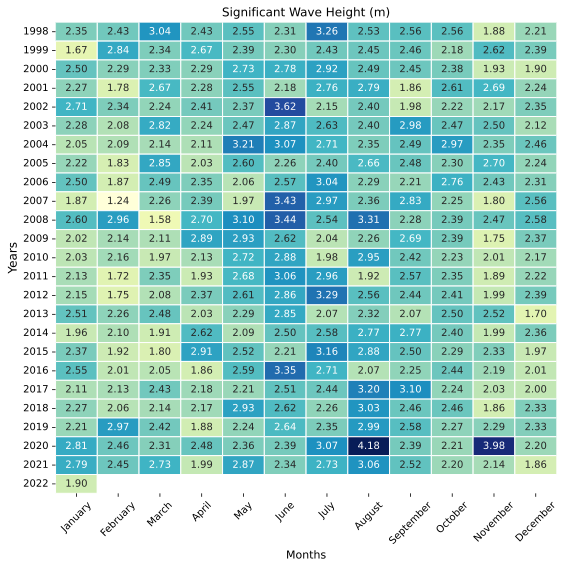

Figure saved:  whall_wh_heatmap


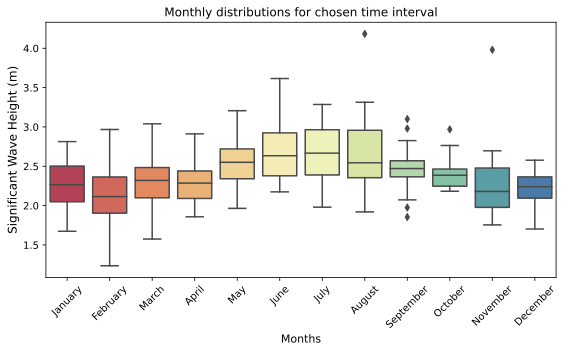

Figure saved:  whall_wh_distribution


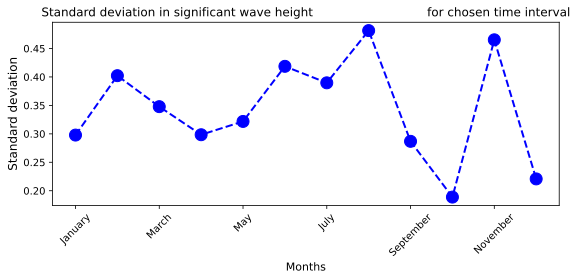

Figure saved:  whall_wh_sd
 
Change in yearly wave height trend accounting                       for seasonality:
    +           trend:  no trend
    +    slope (cm/y):  -0.37


In [10]:
wh_all = wa.computeSeasonalCharacteristics(series='wh', time=[1998,2022], 
                                           lonlat=None, fsave='whall', 
                                           plot=True)

As mentionned above, the function `seriesSeasonMonth` returns a **Pandas dataframe** containing the mean monthly values of specified wave series for the considered time interval.

These information can be displayed with: 

In [11]:
display(wh_all)

month   January  February     March     April       May      June      July  \
year                                                                          
1998   2.351125  2.425917  3.040265  2.427109  2.552500  2.309143  3.263586   
1999   1.673945  2.836879  2.342707  2.669639  2.391367  2.296109  2.429948   
2000   2.497226  2.285891  2.332154  2.294438  2.726764  2.778115  2.922851   
2001   2.265762  1.778638  2.665700  2.278663  2.549330  2.175027  2.756220   
2002   2.714010  2.344036  2.241866  2.408382  2.371654  3.615593  2.149962   
2003   2.282797  2.082947  2.819879  2.242561  2.466642  2.871246  2.628882   
2004   2.048775  2.092250  2.139200  2.110106  3.206565  3.071079  2.705356   
2005   2.215741  1.827771  2.852046  2.030109  2.604337  2.264110  2.401800   
2006   2.503040  1.867578  2.489957  2.347581  2.061703  2.565318  3.038460   
2007   1.865212  1.235417  2.261357  2.390000  1.965088  3.427692  2.973565   
2008   2.602917  2.962240  1.575316  2.695333  3.099453  3.435422  2.542072   
2009   2.015606  2.140485  2.105447  2.892028  2.930750  2.616813  2.041192   
2010   2.028063  2.162133  1.968643  2.130133  2.718922  2.878697  1.980352   
2011   2.126367  1.720738  2.349652  1.930381  2.682422  3.063089  2.961919   
2012   2.150060  1.746443  2.077967  2.369283  2.612365  2.856000  3.285780   
2013   2.507871  2.264353  2.482410  2.033311  2.294106  2.847093  2.067241   
2014   1.961906  2.099954  1.912664  2.624580  2.089423  2.500000  2.579736   
2015   2.373046  1.916639  1.796031  2.912307  2.521923  2.214972  3.161575   
2016   2.554500  2.011925  2.048267  1.857957  2.594773  3.346219  2.711631   
2017   2.105852  2.130423  2.425995  2.183077  2.210185  2.514762  2.444903   
2018   2.266022  2.060451  2.142555  2.168228  2.927364  2.624287  2.256197   
2019   2.211907  2.967576  2.415054  1.880159  2.238704  2.644192  2.354239   
2020   2.814081  2.455342  2.308708  2.480500  2.357551  2.394148  3.071855   
2021   2.790261  2.446792  2.725048  1.986711  2.872462  2.335015  2.732613   
2022   1.897000       NaN       NaN       NaN       NaN       NaN       NaN   

month    August  September   October  November  December      mean  
year                                                                
1998   2.526967   2.564328  2.555900  1.878290  2.211563  2.508891  
1999   2.452140   2.464948  2.183050  2.623078  2.386524  2.395861  
2000   2.488395   2.446198  2.381438  1.932771  1.904865  2.415925  
2001   2.787217   1.855100  2.611306  2.687300  2.235864  2.387177  
2002   2.402836   1.975706  2.223702  2.170740  2.345836  2.413693  
2003   2.401291   2.979702  2.474192  2.502054  2.124177  2.489698  
2004   2.346845   2.494755  2.969511  2.346545  2.456098  2.498924  
2005   2.662074   2.477600  2.295500  2.696750  2.244243  2.381007  
2006   2.288572   2.214572  2.764315  2.427338  2.311109  2.406629  
2007   2.358028   2.826820  2.248427  1.795250  2.562935  2.325816  
2008   3.313776   2.280530  2.392714  2.470267  2.577655  2.662308  
2009   2.260117   2.690313  2.391678  1.754929  2.374438  2.351150  
2010   2.945625   2.422617  2.233061  2.009789  2.167761  2.303816  
2011   1.920108   2.567542  2.346884  1.892022  2.216671  2.314816  
2012   2.562216   2.441888  2.406118  1.992882  2.390924  2.407661  
2013   2.324676   2.073398  2.498480  2.515064  1.702825  2.300902  
2014   2.771043   2.766642  2.403732  1.994765  2.362359  2.338900  
2015   2.875021   2.499324  2.293644  2.334692  1.968080  2.405604  
2016   2.067903   2.252633  2.444969  2.189750  2.006399  2.340577  
2017   3.202026   3.100366  2.244160  2.026477  1.996339  2.382047  
2018   3.032335   2.458582  2.462659  1.860843  2.331464  2.382582  
2019   2.994198   2.578210  2.266514  2.286915  2.326593  2.430355  
2020   4.183331   2.394577  2.207719  3.980976  2.195020  2.736984  
2021   3.058625   2.518919  2.200070  2.136485  1.856753  2.471646  
2022        NaN        NaN       NaN       NaN       NaN  1.897000

Below we provide an example of how this function can be used to process seasonability for different geographical extents.

In [12]:
# First we create a dictionary of 1 by 1 degree tiles within our regional area of interest
tiles = []
tiles.append([152.0,153.0,-36.0,-35.0])
tiles.append([153.0,154.0,-36.0,-35.0])
tiles.append([152.0,153.0,-35.0,-34.0])
tiles.append([153.0,154.0,-35.0,-34.0])

# We also store the geographical locations of the center of each tile 
lonlat = []
lonlat.append([152.5,-35.5])
lonlat.append([153.5,-35.5])
lonlat.append([152.5,-34.5])
lonlat.append([153.5,-34.5])


# And we define a new dictionary that will be filled with regional wave seasonability
seasons = []

# Finally we loop over the defined tiles and perform seasonability analysis for significant wave height
for k in range(4):
    seasons.append(wa.computeSeasonalCharacteristics(series='wh', time=[1998,2022], 
                                        lonlat=tiles[k], plot=False))

This can then be used to plot the annual mean values of significant wave height for each tile over the temporal range of interest... 

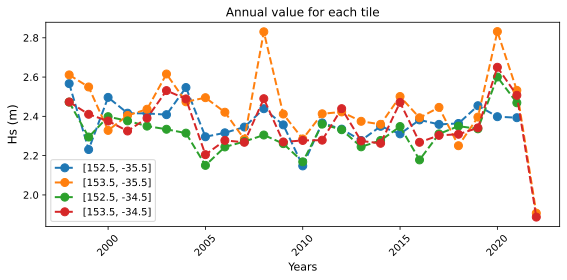

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['mathtext.fontset'] = 'cm'

fig, ax = plt.subplots(figsize = (8,4))

for k in range(4):
    yearwh = seasons[k]['mean']
    yearwh.plot(marker='o', linestyle='dashed', linewidth=2, markersize=8)
    
ax.set_title('Annual value for each tile',fontsize = 12)
ax.set_ylabel("Hs (m)",fontsize = 12)
ax.set_xlabel('Years',fontsize = 11)
ax.legend([lonlat[0],lonlat[1],lonlat[2],lonlat[3]])
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10, rotation=45)
plt.tight_layout()
plt.show()

# 20-years analysis of the impact of climate trend 

Oscillation in atmospheric patterns is known to alter regional weather conditions and associated trends in wave climate [Godoi et al., 2016].

Here we illustrate how the results obtained with **RADWave** can be used to investigate how climate patterns may affect  wave parameters.

For the sake of the demonstration, we will focus our analysis on the following indices:

+ SOI - Southern Oscillation Index / [information](http://www.bom.gov.au/climate/enso/history/ln-2010-12/SOI-what.shtml)
+ AOI - Antarctic Oscillation Index / [information](https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/aao/aao_index.html)
+ SAMI - Southern Annular Mode Index / [information](http://www.bom.gov.au/climate/sam/)

We first load the data associated to each index using `Pandas` functionalities.

+ Godoi, V.A., Bryan, K.R. and Gorman, R.M., 2016. [Regional influence of climate patterns on the wave climate of the southwestern Pacific: The New Zealand region](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2015JC011572). Journal of Geophysical Research: Oceans, 121(6), pp.4056-4076.

In [14]:
# Defining the 20-years timeframe
time = [1998,2022] 

Monthly means of the SOI, AOI & SAMI index are sourced from the National Oceanic and Atmospheric Administration (**NOAA**) and the Natural Environment Research Council from the British Antarctic Survey (**NERC**). 

For each climate index the anomalies are computed by subtracting overall mean from the monthly means. 

Then, the same is done for the wave parameters in order to investigate how they are modulated by the climate modes.


## SOI - Southern Oscillation Index

In [15]:
import io
import scipy
import requests
import numpy as np 
import pandas as pd

# Dataset URL
url = "http://www.bom.gov.au/climate/enso/soi_monthly.txt"


names = [
    "Date",
    "Value"
]

# Using Pandas to load the file content
# soi = requests.get(url).content
# soi_data = pd.read_csv(io.StringIO(soi.decode('utf-8')), names=names,skiprows=1)
filename = "../../dataset/soi_monthly.txt"
soi_data = pd.read_csv(filename, names=names) #,skiprows=0)

# Define year and month of each record
soi_data['year'] = soi_data['Date'] // 100
soi_data['month'] = soi_data['Date'] % 100 

# Extract the information for the specified time interval 
soi_df = soi_data.drop(soi_data[soi_data.year < time[0]].index)
soi_df = soi_df.drop(soi_df[soi_df.year > time[1]].index)

# Calculate the 20-years mean 
soi_mean = soi_df['Value'].mean()

# Compute and store the anomalies in the dataframe
soi_df['anomaly'] = soi_df['Value']-soi_mean

soi_df["day"] = np.ones(len(soi_df["Value"]),dtype=int)
soi_df['time'] = pd.to_datetime(soi_df[['year','month','day']])

## AOI - Antarctic Oscillation Index

In [16]:
# Dataset URL
url = "https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/aao/monthly.aao.index.b79.current.ascii"

# Using Pandas to load the file content
aoi = requests.get(url).content
aoi_data = pd.read_csv(io.StringIO(aoi.decode('utf-8')),delimiter=r"\s+",header=None)

# Rename columns to fit with RADWave dataframe
aoi_data = aoi_data.rename(columns={0:"year", 1:"month", 2:"Value"})

# Extract the information for the specified time interval 
aoi_df = aoi_data.drop(aoi_data[aoi_data.year < time[0]].index)
aoi_df = aoi_df.drop(aoi_df[aoi_df.year > time[1]].index)

# Calculate the 20-years mean 
aoi_mean = aoi_df['Value'].mean()

# Compute and store the anomalies in the dataframe
aoi_df['anomaly'] = aoi_df['Value']-aoi_mean

## SAMI - Southern Annular Mode Index

In [17]:
# Dataset URL
url = "http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt"

# Using Pandas to load the file content
sam = requests.get(url).content
sam_data = pd.read_csv(io.StringIO(sam.decode('utf-8')),delimiter=r"\s+")

# Rename month values to fit with RADWave dataframe
sam_data = sam_data.rename(columns={"JAN":1, "FEB":2,
                      "MAR":3, "APR":4,
                      "MAY":5, "JUN":6,
                      "JUL":7, "AUG":8,
                      "SEP": 9, "OCT":10,
                      "NOV":11, "DEC":12})

# Rename columns to fit with RADWave dataframe
sam_data = sam_data.stack().reset_index()
sam_data = sam_data.rename(columns={"level_0":"year", "level_1":"month", 0:"Value"})


# Extract the information for the specified time interval 
sam_df = sam_data.drop(sam_data[sam_data.year < time[0]].index)
sam_df = sam_df.drop(sam_df[sam_df.year > time[1]].index)

# Calculate the 20-years mean 
sam_mean = sam_df['Value'].mean()

# Compute and store the anomalies in the dataframe
sam_df['anomaly'] = sam_df['Value']-sam_mean

## RADWave significant wave height and wave period anomalies

### Significant wave height

In [18]:
# Get monthly significant wave height 
wh_data = wa.timeseries.groupby(['year', 'month'])[['wh']].apply(np.mean).reset_index()

# Extract the information for the specified time interval 
wh_df = wh_data.drop(wh_data[wh_data.year < time[0]].index)
wh_df = wh_df.drop(wh_df[wh_df.year > time[1]].index)

# Calculate the 20-years mean 
wh_mean = wh_df['wh'].mean()

# Compute and store the anomalies in the dataframe
wh_df['anomaly'] = wh_df['wh']-wh_mean

### Wave period

In [19]:
# Get monthly mean wave period 
T_data = wa.timeseries.groupby(['year', 'month'])[['period']].apply(np.mean).reset_index()

# Extract the information for the specified time interval 
T_df = T_data.drop(T_data[T_data.year < time[0]].index)
T_df = T_df.drop(T_df[T_df.year > time[1]].index)

# Calculate the 20-years mean 
T_mean = T_df['period'].mean()

# Compute and store the anomalies in the dataframe
T_df['anomaly'] = T_df['period']-T_mean

## Correlations

Monthly mean anomalies of significant wave height and wave period can be correlated with monthly mean anomaly time series of the SOI, AOI & SAMI index by computing the **Pearson’s correlation coefficient** (R) for the region of interest. 

We use [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function to make this calculation. This function returns 2 values:

+ r: Pearson’s correlation coefficient.
+ p: Two-tailed p-value.

> Examples of **Pearson’s correlation coefficient** calculation between climate indices and the significant wave height are provided below:

In [20]:
# Pearson correlation between significant wave height and SOI
monthly_wh_soi = scipy.stats.pearsonr(soi_df['anomaly'],wh_df['anomaly']) 
print('+ Pearson correlation between significant wave height and SOI:',monthly_wh_soi[0],'\n')

# Pearson correlation between significant wave height and AOI
monthly_wh_aoi = scipy.stats.pearsonr(aoi_df['anomaly'],wh_df['anomaly']) 
print('+ Pearson correlation between significant wave height and AOI:',monthly_wh_aoi[0],'\n')

# Pearson correlation between significant wave height and SAMI
monthly_wh_sam = scipy.stats.pearsonr(sam_df['anomaly'],wh_df['anomaly']) 
print('+ Pearson correlation between significant wave height and SAMI:',monthly_wh_sam[0],'\n')

+ Pearson correlation between significant wave height and SOI: -0.0365678094399993 



ValueError: x and y must have the same length.

In [ ]:
# Pearson correlation between significant wave period and SOI
monthly_tp_soi = scipy.stats.pearsonr(soi_df['anomaly'],T_df['anomaly']) 
print('+ Pearson correlation between significant wave period and SOI:',monthly_tp_soi[0],'\n')

# Pearson correlation between significant wave period and AOI
monthly_tp_aoi = scipy.stats.pearsonr(aoi_df['anomaly'],T_df['anomaly']) 
print('+ Pearson correlation between significant wave period and AOI:',monthly_tp_aoi[0],'\n')

# Pearson correlation between significant wave period and SAMI
monthly_tp_sam = scipy.stats.pearsonr(sam_df['anomaly'],T_df['anomaly']) 
print('+ Pearson correlation between significant wave period and SAMI:',monthly_tp_sam[0],'\n')